<a href="https://colab.research.google.com/github/Indsinha/Machine-Learning--Projects/blob/master/dronestability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone Flight Stability Prediction using ANN

## Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
url = "https://drive.google.com/uc?id=1vQqYpizF80HMV4DI4BtHlA2gWADD5jaU"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,altitude,speed,battery_voltage,wind_speed,gps_signal_strength,motor_temperature,rotor_rpm,yaw,pitch,roll,...,roll_variance,yaw_variance,ambient_temperature,barometric_pressure,humidity,altitude_variance,battery_health,rotor_balance,weather_index,stability
0,583.991057,40.018161,12.561567,6.958067,6.916161,31.953824,1313.719200,-4.274176,17.998836,5.314505,...,0.937639,0.307126,21.349431,1015.317392,14.910591,0.809911,74.948794,-0.090940,7.090202,Slightly Unstable
1,407.770879,45.524336,12.994688,8.543750,50.298182,31.560271,1034.846634,-9.441453,-0.045522,-33.086822,...,0.980134,0.946508,21.898056,1012.599127,5.425894,0.986507,47.522597,0.695410,2.520402,Highly Unstable
2,461.656141,46.464138,12.787444,5.874334,37.752007,45.244738,994.264517,1.464487,7.985038,-17.274817,...,0.959776,1.022070,28.484726,1021.239581,26.316345,0.686239,51.404272,0.779022,5.079244,Highly Unstable
3,538.938703,63.120405,11.614604,4.391468,16.980825,33.412759,1055.122680,13.257857,4.958650,5.258945,...,1.251443,0.692096,17.490672,1009.265116,29.129638,0.938553,49.463416,0.059708,4.955127,Slightly Unstable
4,619.014528,62.363200,12.995243,6.501253,29.842095,37.698003,1198.231981,-11.901650,-3.046865,3.815538,...,0.959113,0.402179,16.146242,1009.539986,28.905452,1.431497,31.449661,-0.097084,7.545434,Slightly Unstable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   altitude               150000 non-null  float64
 1   speed                  150000 non-null  float64
 2   battery_voltage        150000 non-null  float64
 3   wind_speed             150000 non-null  float64
 4   gps_signal_strength    150000 non-null  float64
 5   motor_temperature      150000 non-null  float64
 6   rotor_rpm              150000 non-null  float64
 7   yaw                    150000 non-null  float64
 8   pitch                  150000 non-null  float64
 9   roll                   150000 non-null  float64
 10  signal_to_noise_ratio  150000 non-null  float64
 11  weather_condition      150000 non-null  int64  
 12  flight_mode            150000 non-null  int64  
 13  proximity_alert        150000 non-null  int64  
 14  rotor_efficiency       150000 non-nu

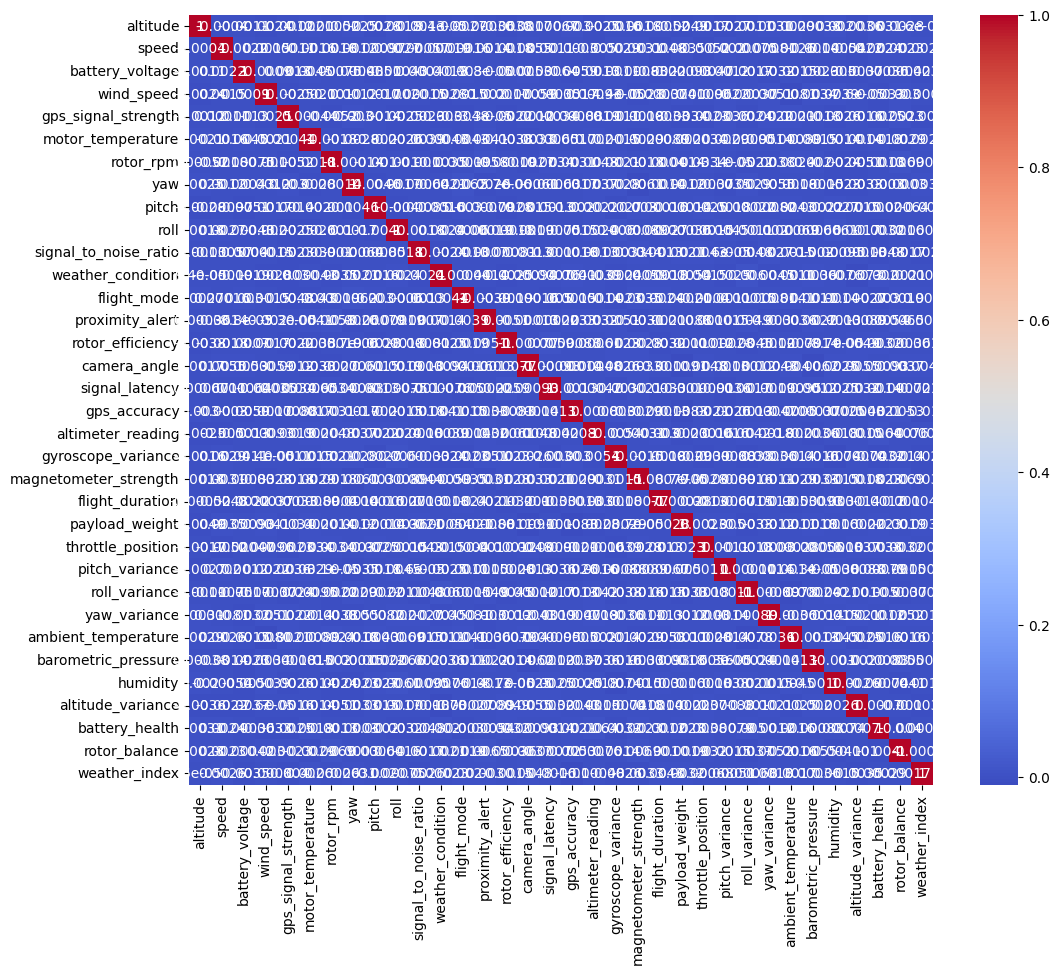

In [3]:
# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:


# Remove or correct inconsistent values (if any)
# Example: Remove rows with extreme outliers
df = df[(df['altitude'] > -1000) & (df['altitude'] < 10000)]

In [7]:
# Separate features and target
X = df.drop('stability', axis=1)
y = df['stability']

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

In [11]:
# Check class distribution
print(y.value_counts())

# Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# One-hot encode the resampled target variable
y_resampled_encoded = encoder.transform(y_resampled.values.reshape(-1, 1))

stability
Slightly Unstable    51000
Highly Unstable      49500
Stable               49500
Name: count, dtype: int64


In [12]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Step 2: ANN Model Design

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,915 (58.26 KB)

 Trainable params: 14,915 (58.26 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Training and Hyperparameter Tuning

In [16]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5762 - loss: 0.8396 - val_accuracy: 0.8144 - val_loss: 0.4211
Epoch 2/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7852 - loss: 0.4843 - val_accuracy: 0.8349 - val_loss: 0.3704
Epoch 3/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8178 - loss: 0.4168 - val_accuracy: 0.8809 - val_loss: 0.2852
Epoch 4/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8506 - loss: 0.3474 - val_accuracy: 0.8991 - val_loss: 0.2422
Epoch 5/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8643 - loss: 0.3149 - val_accuracy: 0.9052 - val_loss: 0.2286
Epoch 6/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.2907 - val_accuracy: 0.8968 - val_loss: 0.2341
Epoch 7/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8794 - loss: 0.2774 - val_accuracy: 0.9164 - val_loss: 0.2025
Epoch 8/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8916 - loss: 0.2541 - val_accu

In [18]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [19]:
# For hyperparameter tuning, you can use Keras Tuner or Optuna
# Example using Keras Tuner
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='skypro_stability'
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 04m 43s]
val_accuracy: 0.9203921357790629

Best val_accuracy So Far: 0.9268119136492411
Total elapsed time: 00h 21m 59s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Step 4: Evaluate the Model

In [20]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(confusion_matrix(y_true_classes, y_pred_classes))

718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9299 - loss: 0.1719
Test Accuracy: 0.9284
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7622
           1       0.93      0.97      0.95      7660
           2       0.91      0.88      0.89      7668

    accuracy                           0.93     22950
   macro avg       0.93      0.93      0.93     22950
weighted avg       0.93      0.93      0.93     22950

[[7167    0  455]
 [   0 7420  240]
 [ 348  600 6720]]


In [21]:
# Investigate misclassified instances
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]
print(f'Misclassified instances: {misclassified_indices}')

Misclassified instances: [    1     5     6 ... 22931 22936 22944]


In [22]:
# Use SHAP or LIME for feature importance
import shap

explainer = shap.DeepExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


KeyboardInterrupt: 

In [ ]:
# Use SHAP or LIME for feature importance
import shap

explainer = shap.DeepExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


KeyboardInterrupt: 

In [ ]:
# Use SHAP or LIME for feature importance
import shap

explainer = shap.DeepExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


KeyboardInterrupt: 

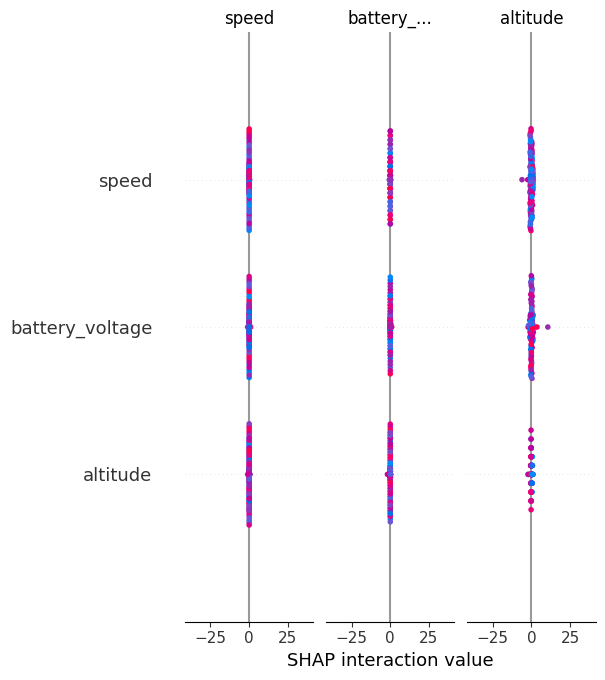

In [24]:
import shap

# 1. Use a smaller background dataset:
background_data = shap.sample(X_train, nsamples=100)  # Reduce background samples

# 2. Create the explainer with the background dataset:
explainer = shap.DeepExplainer(best_model, background_data)

# 3. Calculate SHAP values for a subset of the test data:
shap_values = explainer.shap_values(shap.sample(X_test, nsamples=100))  # Reduce test samples

# 4. Create the summary plot:
shap.summary_plot(shap_values, shap.sample(X_test, nsamples=100), feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


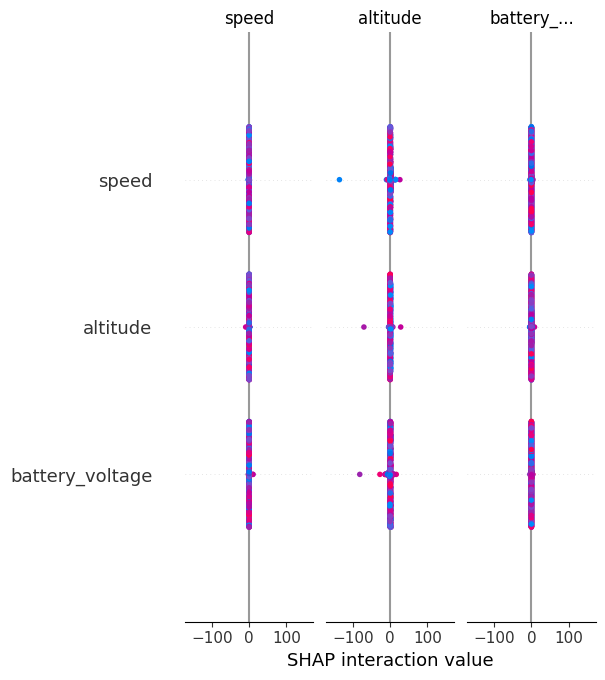

In [25]:
import shap

# 1. Use a smaller background dataset:
background_data = shap.sample(X_train, nsamples=1000)  # Reduce background samples

# 2. Create the explainer with the background dataset:
explainer = shap.DeepExplainer(best_model, background_data)

# 3. Calculate SHAP values for a subset of the test data:
shap_values = explainer.shap_values(shap.sample(X_test, nsamples=1000))  # Reduce test samples

# 4. Create the summary plot:
shap.summary_plot(shap_values, shap.sample(X_test, nsamples=1000), feature_names=X.columns)

## Step 5: Insights and Recommendations

In [26]:
# Based on SHAP values, identify key features
# Example: Print the top 5 features
shap_sum = np.abs(shap_values).mean(axis=0)
top_features_indices = np.argsort(shap_sum)[-5:]
top_features = X.columns[top_features_indices]
print(f'Top 5 features: {top_features}')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [27]:
# Based on SHAP values, identify key features
# Example: Print the top 5 features
shap_sum = np.abs(shap_values).mean(axis=0)  # Calculate mean SHAP values across samples

# Get the top 5 features for each class
top_features_indices = np.argsort(shap_sum, axis=0)[-5:, :]  # Sort for each class

# Print top features for each class
for class_idx in range(shap_sum.shape[1]):
    top_features = X.columns[top_features_indices[:, class_idx]]
    print(f'Top 5 features for class {class_idx}: {top_features}')

Top 5 features for class 0: Index(['gps_signal_strength', 'pitch', 'yaw', 'roll', 'altitude'], dtype='object')
Top 5 features for class 1: Index(['gps_signal_strength', 'roll', 'altitude', 'yaw', 'pitch'], dtype='object')
Top 5 features for class 2: Index(['gps_signal_strength', 'altitude', 'roll', 'yaw', 'pitch'], dtype='object')


## Step 6: Deliverables

In [28]:
# Save the final model
best_model.save('final_model.h5')

# Save the preprocessing steps
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Report
Include data exploration findings, model architecture details, and performance metrics.
Provide actionable insights and recommendations.

## Saved Model
Share the trained ANN model (e.g., .h5 file) for deployment.